In [0]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 28 15:49:48 2020

@author: Nick
"""

# -*- coding: utf-8 -*-
"""
Created on Mon Jan 27 19:01:13 2020

@author: Nicklaus Roy
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


dataset = pd.read_csv('survey_results_public.csv')

#important/ necessary columns:
columns = ['Respondent','YearsCodingProf','SalaryType','ConvertedSalary']
dataframe = dataset[columns]

#trying to drop empty ToT
dataframe = dataframe.dropna(axis='rows',how='all')
dataframe.head()

,Respondent,YearsCodingProf,SalaryType,ConvertedSalary
0,1,3-5 years,Monthly,NaN
1,3,18-20 years,Yearly,70841.0
2,4,6-8 years,NaN,NaN
3,5,12-14 years,NaN,NaN
4,7,0-2 years,Yearly,21426.0


In [0]:
#conditional statement for strings converted to int
#int are already computed as average
def function(glob3):
  if(glob3['YearsCodingProf'] == '0-2 years'):
    return 1
  elif(glob3['YearsCodingProf'] == '3-5 years'):
    return 4
  elif(glob3['YearsCodingProf'] == '6-8 years'):
    return 7
  elif(glob3['YearsCodingProf'] == '9-11 years'):
    return 10
  elif(glob3['YearsCodingProf'] == '12-14 years'):
    return 13
  elif(glob3['YearsCodingProf'] == '15-17 years'):
    return 16
  elif(glob3['YearsCodingProf'] == '18-20 years'):
    return 19
  elif(glob3['YearsCodingProf'] == '21-23 years'):
    return 22
  elif(glob3['YearsCodingProf'] == '24-26 years'):
    return 25
  elif(glob3['YearsCodingProf'] == '27-29 years'):
    return 28
  else:
    return 30

dataframe['Years(Ave.)'] = dataframe.apply(function, axis=1)
#dataframe.insert(2,'Years(Ave.)',glob3,True)
dataframe = dataframe.loc[:,~dataframe.columns.duplicated()]
dataframe.head()


,Respondent,YearsCodingProf,SalaryType,ConvertedSalary,Years(Ave.)
0,1,3-5 years,Monthly,NaN,4
1,3,18-20 years,Yearly,70841.0,19
2,4,6-8 years,NaN,NaN,7
3,5,12-14 years,NaN,NaN,13
4,7,0-2 years,Yearly,21426.0,1


In [0]:
#trying to remove all empty or NaN
dataframe = dataframe.dropna(how='any')
dataframe.head()

,Respondent,YearsCodingProf,SalaryType,ConvertedSalary,Years(Ave.)
1,3,18-20 years,Yearly,70841.0,19
4,7,0-2 years,Yearly,21426.0,1
6,9,0-2 years,Yearly,120000.0,1
8,11,21-23 years,Yearly,250000.0,22
14,21,0-2 years,Monthly,0.0,1


In [0]:
#converting US dollars to Ph peso ToT
#ConvertedSalary is already in USD?! idunno
#1 USD = 50.96 PHP
#convert monthly salary to php

def function1(convert):
    return int((convert['ConvertedSalary']*50.96)/12)

dataframe['MonthlySalary(PHP)'] = dataframe.apply(function1, axis=1)
dataframe.head()



,Respondent,YearsCodingProf,SalaryType,ConvertedSalary,Years(Ave.),MonthlySalary(PHP)
1,3,18-20 years,Yearly,70841.0,19,300838
4,7,0-2 years,Yearly,21426.0,1,90989
6,9,0-2 years,Yearly,120000.0,1,509600
8,11,21-23 years,Yearly,250000.0,22,1061666
14,21,0-2 years,Monthly,0.0,1,0


(3314, 129)
         Respondent   AssessJob1  ...  AdsPriorities6  AdsPriorities7
count   3314.000000  2373.000000  ...     2141.000000     2141.000000
mean    3042.985214     6.563422  ...        5.154134        4.822046
std     3053.593231     2.760211  ...        1.840502        1.849375
min        1.000000     1.000000  ...        1.000000        1.000000
25%     1167.500000     5.000000  ...        4.000000        3.000000
50%     2329.500000     7.000000  ...        6.000000        5.000000
75%     3524.750000     9.000000  ...        7.000000        6.000000
max    14275.000000    10.000000  ...        7.000000        7.000000

[8 rows x 42 columns]


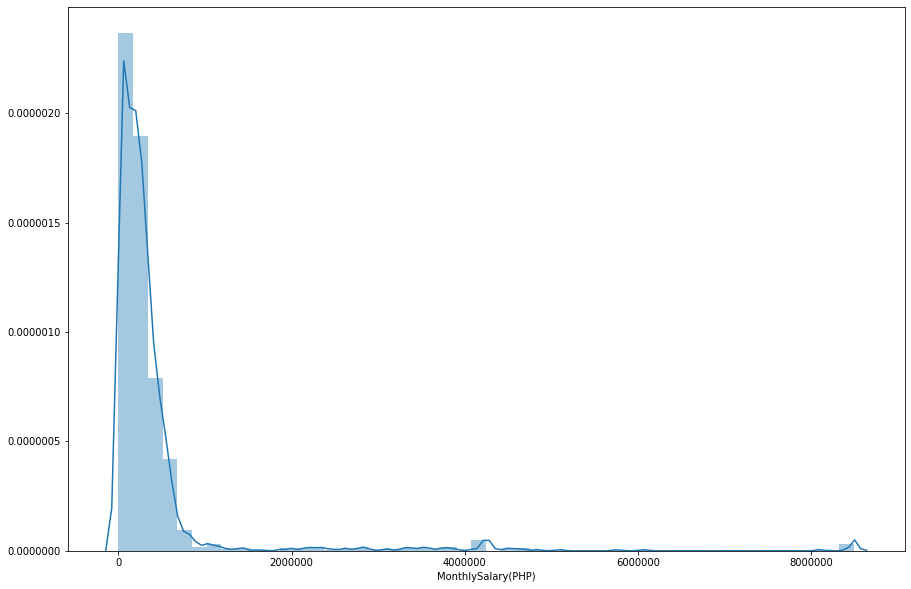

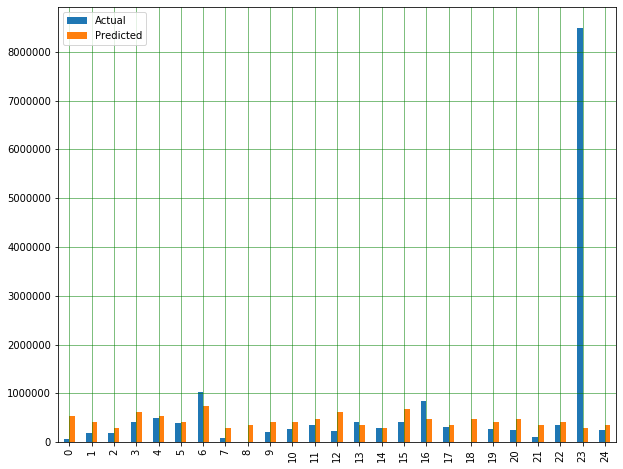

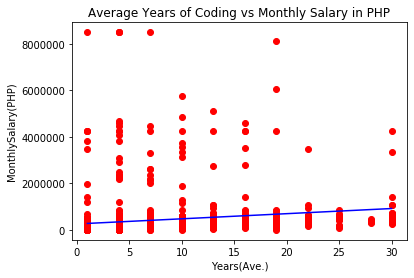

In [0]:
print(dataset.shape)
print(dataset.describe())

X = dataframe[['Years(Ave.)']].values
y = dataframe['MonthlySalary(PHP)'].values

plt.figure(figsize=(15,10))
plt.tight_layout()

#seabornInstance.distplot(dataframe['MonthlySalary(PHP)'])

g1 = 'MonthlySalary(PHP)'
g2 = seabornInstance.distplot(dataframe[g1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df1 = df.head(25)

df1.plot(kind='bar', figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Years of Coding vs Monthly Salary in PHP')
plt.xlabel('Years(Ave.)')
plt.ylabel('MonthlySalary(PHP)')
plt.show()